# Data preparation

In [ ]:
# load raw data
# https://drive.google.com/file/d/1Iee3Xu-Auy1ipEH3EneZVlNZrgzdrNw2/view?usp=share_link
system("gdown --id 1Iee3Xu-Auy1ipEH3EneZVlNZrgzdrNw2")
historic_property_data_raw <- read.csv("historic_property_data.csv")

#https://drive.google.com/file/d/11P7dzl9HgvlIGpUqfBakwoxHnAnwmlSO/view?usp=sharing
system("gdown --id 11P7dzl9HgvlIGpUqfBakwoxHnAnwmlSO")
predict_raw <- read.csv("predict_property_data.csv")

In [ ]:
historic_property_data <- historic_property_data_raw
predict <- predict_raw

In [ ]:
# load packages
library(dplyr)
install.packages('fastDummies')
library(fastDummies)
install.packages('caret')
library(caret)
library(magrittr)
install.packages('randomForest')
library(randomForest)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




In [ ]:
# convert to character
historic_property_data$meta_class                  <- as.character(historic_property_data$meta_class)
historic_property_data$meta_town_code              <- as.character(historic_property_data$meta_town_code)
historic_property_data$char_ext_wall               <- as.character(historic_property_data$char_ext_wall)
historic_property_data$char_roof_cnst              <- as.character(historic_property_data$char_roof_cnst)
historic_property_data$char_bsmt                   <- as.character(historic_property_data$char_bsmt)
historic_property_data$char_bsmt_fin               <- as.character(historic_property_data$char_bsmt_fin)
historic_property_data$char_heat                   <- as.character(historic_property_data$char_heat)
historic_property_data$char_oheat                  <- as.character(historic_property_data$char_oheat)
historic_property_data$char_air                    <- as.character(historic_property_data$char_air)
historic_property_data$char_attic_type             <- as.character(historic_property_data$char_attic_type)
historic_property_data$char_tp_plan                <- as.character(historic_property_data$char_tp_plan)
historic_property_data$char_cnst_qlty              <- as.character(historic_property_data$char_cnst_qlty)
historic_property_data$char_site                   <- as.character(historic_property_data$char_site)
historic_property_data$char_gar1_size              <- as.character(historic_property_data$char_gar1_size)
historic_property_data$char_gar1_cnst              <- as.character(historic_property_data$char_gar1_cnst)
historic_property_data$char_gar1_att               <- as.character(historic_property_data$char_gar1_att)
historic_property_data$char_gar1_area              <- as.character(historic_property_data$char_gar1_area)
historic_property_data$char_repair_cnd             <- as.character(historic_property_data$char_repair_cnd)
historic_property_data$char_use                    <- as.character(historic_property_data$char_use)
historic_property_data$char_type_resd              <- as.character(historic_property_data$char_type_resd)
historic_property_data$geo_fips                    <- as.character(historic_property_data$geo_fips)
historic_property_data$geo_ohare_noise             <- as.character(historic_property_data$geo_ohare_noise)
historic_property_data$geo_floodplain              <- as.character(historic_property_data$geo_floodplain)
historic_property_data$geo_fs_flood_risk_direction <- as.character(historic_property_data$geo_fs_flood_risk_direction)
historic_property_data$geo_withinmr100             <- as.character(historic_property_data$geo_withinmr100)
historic_property_data$geo_withinmr101300          <- as.character(historic_property_data$geo_withinmr101300)
historic_property_data$ind_large_home              <- as.character(historic_property_data$ind_large_home)
historic_property_data$ind_garage                  <- as.character(historic_property_data$ind_garage)
historic_property_data$ind_arms_length             <- as.character(historic_property_data$ind_arms_length)

predict$meta_class                  <- as.character(predict$meta_class)
predict$meta_town_code              <- as.character(predict$meta_town_code)
predict$char_ext_wall               <- as.character(predict$char_ext_wall)
predict$char_roof_cnst              <- as.character(predict$char_roof_cnst)
predict$char_bsmt                   <- as.character(predict$char_bsmt)
predict$char_bsmt_fin               <- as.character(predict$char_bsmt_fin)
predict$char_heat                   <- as.character(predict$char_heat)
predict$char_oheat                  <- as.character(predict$char_oheat)
predict$char_air                    <- as.character(predict$char_air)
predict$char_attic_type             <- as.character(predict$char_attic_type)
predict$char_tp_plan                <- as.character(predict$char_tp_plan)
predict$char_cnst_qlty              <- as.character(predict$char_cnst_qlty)
predict$char_site                   <- as.character(predict$char_site)
predict$char_gar1_size              <- as.character(predict$char_gar1_size)
predict$char_gar1_cnst              <- as.character(predict$char_gar1_cnst)
predict$char_gar1_att               <- as.character(predict$char_gar1_att)
predict$char_gar1_area              <- as.character(predict$char_gar1_area)
predict$char_repair_cnd             <- as.character(predict$char_repair_cnd)
predict$char_use                    <- as.character(predict$char_use)
predict$char_type_resd              <- as.character(predict$char_type_resd)
predict$geo_fips                    <- as.character(predict$geo_fips)
predict$geo_ohare_noise             <- as.character(predict$geo_ohare_noise)
predict$geo_floodplain              <- as.character(predict$geo_floodplain)
predict$geo_fs_flood_risk_direction <- as.character(predict$geo_fs_flood_risk_direction)
predict$geo_withinmr100             <- as.character(predict$geo_withinmr100)
predict$geo_withinmr101300          <- as.character(predict$geo_withinmr101300)
predict$ind_large_home              <- as.character(predict$ind_large_home)
predict$ind_garage                  <- as.character(predict$ind_garage)
predict$ind_arms_length             <- as.character(predict$ind_arms_length)

In [ ]:
idx_feat_cat_mask <- grepl('character', sapply(historic_property_data, class))     # Obtain feature index masks

idx_feat_cat_tmp <- colnames(predict)[idx_feat_cat_mask]  # Obtain feature indices
predict_cat <- predict[, idx_feat_cat_tmp]             # Subset historic_property_df with feature indices
dim(predict_cat)

idx_feat_cat_tmp <- colnames(historic_property_data)[idx_feat_cat_mask]    # Obtain feature indices
train_cat <- historic_property_data[, idx_feat_cat_tmp]                 # Subset historic_property_df with feature indices
dim(train_cat)
str(train_cat)

[1] 10000    36

[1] 50000    36

'data.frame':	50000 obs. of  36 variables:
 $ meta_class                 : chr  "278" "204" "203" "234" ...
 $ meta_town_code             : chr  "31" "25" "70" "35" ...
 $ meta_cdu                   : chr  NA NA NA NA ...
 $ meta_deed_type             : chr  "T" "W" "W" "W" ...
 $ char_ext_wall              : chr  "3" "3" "2" "1" ...
 $ char_roof_cnst             : chr  "1" "1" "1" "1" ...
 $ char_bsmt                  : chr  "1" "2" "1" "3" ...
 $ char_bsmt_fin              : chr  "3" "3" "3" "1" ...
 $ char_heat                  : chr  "1" "1" "1" "1" ...
 $ char_oheat                 : chr  "5" "5" "5" "5" ...
 $ char_air                   : chr  "1" "1" "2" "2" ...
 $ char_attic_type            : chr  "3" "2" "1" "3" ...
 $ char_tp_plan               : chr  "2" "1" "2" "2" ...
 $ char_cnst_qlty             : chr  "2" "2" "2" "2" ...
 $ char_site                  : chr  "2" "2" "2" "2" ...
 $ char_gar1_size             : chr  "3" "3" "3" "3" ...
 $ char_gar1_cnst             : chr  

In [ ]:
na_summary <- cbind( as.data.frame(colnames(train_cat)),
                        as.data.frame(colMeans(is.na(train_cat))))   # Combine feature names & feature NA counts
colnames(na_summary)[1] <- "feature"                                 # Rename column
colnames(na_summary)[2] <- "na_cnt"                                  # Rename column
na_summary <- na_summary[na_summary$na_cnt>0, ]                # Subset feature names (rows) with NAs
na_summary <- na_summary[order(-na_summary$na_cnt),]           # Sort by 'na_cnt' (desc)
na_summary  

,feature,na_cnt
,<chr>,<dbl>
meta_cdu,meta_cdu,0.94392
char_tp_plan,char_tp_plan,0.28450
char_gar1_att,char_gar1_att,0.14240
char_gar1_area,char_gar1_area,0.14240
char_gar1_cnst,char_gar1_cnst,0.14238
geo_fips,geo_fips,0.02304
geo_municipality,geo_municipality,0.02304
char_oheat,char_oheat,0.00346
geo_ohare_noise,geo_ohare_noise,0.00346


In [ ]:
idx_feat_excl <- c( 'meta_town_code',                     # exclude geo features 
                    'geo_property_city',
                    'geo_fips',
                    'geo_municipality',
                    'geo_school_elem_district',
                    'geo_school_hs_district')

idx_feat_sub_mask_tmp <- setdiff(colnames(train_cat), idx_feat_excl)     # Obtain feature indices
train_cat <- train_cat[, idx_feat_sub_mask_tmp]                       # Subset train_cat with feature indices
dim(train_cat)

idx_feat_sub_mask_tmp <- setdiff(colnames(predict_cat), idx_feat_excl)   # Obtain feature indices
predict_cat <- predict_cat[, idx_feat_sub_mask_tmp]                   # Subset predict_cat with feature indices
dim(predict_cat)

[1] 50000    30

[1] 10000    30

In [ ]:
idx_feat_num_mask <- !idx_feat_cat_mask                    # obtain numeric features           

idx_feat_num_tmp <- colnames(historic_property_data)[idx_feat_num_mask]    # Obtain feature indices 
train_num <- historic_property_data[, idx_feat_num_tmp]                  # Subset train_num with feature indices 
dim(train_num)                                                      

idx_feat_num_tmp <- colnames(predict)[idx_feat_num_mask]            # Obtain feature indices  
predict_num <- predict[, idx_feat_num_tmp]                        # Subset predict_num with feature indices
dim(predict_num)                                                    

[1] 50000    27

[1] 10000    27

In [ ]:
# numeric features na value exploration 
na_summary <- cbind( as.data.frame(colnames(train_num)),           
                        as.data.frame(colMeans(is.na(train_num))))  
colnames(na_summary)[1] <- "variable"                                 
colnames(na_summary)[2] <- "na_percentage"                                  
na_summary <- na_summary[na_summary$na_percentage>0, ]                
na_summary <- na_summary[order(-na_summary$na_percentage),]           
na_summary

,variable,na_percentage
,<chr>,<dbl>
char_renovation,char_renovation,0.99436
char_apts,char_apts,0.86206
char_porch,char_porch,0.81448
char_attic_fnsh,char_attic_fnsh,0.66894
char_tp_dsgn,char_tp_dsgn,0.54116
geo_tract_pop,geo_tract_pop,0.00346
geo_white_perc,geo_white_perc,0.00346
geo_black_perc,geo_black_perc,0.00346
geo_asian_perc,geo_asian_perc,0.00346


In [ ]:
# drop features that contain over 35% NA values
thresh = 0.35

train_cat <- train_cat[, which(colMeans(is.na(train_cat)) <= thresh)]      # train data categorical features with more than 35% NAs
train_num <- train_num[, which(colMeans(is.na(train_num)) <= thresh)]      # train data numeric features with more than 35% NAs
dim(train_cat)
dim(train_num)

predict_cat <- predict_cat[, which(colMeans(is.na(predict_cat)) <= thresh)]    # predict data categorical features with more than 35% NAs    
predict_num <- predict_num[, which(colMeans(is.na(predict_num)) <= thresh)]    # predict data numeric features with more than 35% NAs
dim(predict_cat)
dim(predict_num)

[1] 50000    29

[1] 50000    22

[1] 10000    29

[1] 10000    22

In [ ]:
# fill NAs with mode for categorical features
Na_mode <- function(sample_series) {
    unique_samples <- unique(sample_series)
    unique_samples[which.max(tabulate(match(sample_series, unique_samples)))]
    }

train_cat %>% mutate_all(~ifelse(is.na(.x), Na_mode(.x), .x))
predict_cat %>% mutate_all(~ifelse(is.na(.x), Na_mode(.x), .x))

meta_class,meta_deed_type,char_ext_wall,char_roof_cnst,char_bsmt,char_bsmt_fin,char_heat,char_oheat,char_air,char_attic_type,⋯,char_type_resd,geo_property_zip,geo_ohare_noise,geo_floodplain,geo_fs_flood_risk_direction,geo_withinmr100,geo_withinmr101300,ind_large_home,ind_garage,ind_arms_length
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
278,T,3,1,1,3,1,5,1,3,⋯,2,60154,0,0,0,0,0,FALSE,TRUE,TRUE
204,W,3,1,2,3,1,5,1,2,⋯,1,60093,0,0,0,0,0,FALSE,TRUE,TRUE
203,W,2,1,1,3,1,5,2,1,⋯,5,60617,0,0,1,0,0,FALSE,TRUE,TRUE
234,W,1,1,3,1,1,5,2,3,⋯,4,60193,0,0,0,0,0,FALSE,TRUE,TRUE
207,W,3,1,3,3,1,5,1,3,⋯,2,60630,0,0,0,0,0,FALSE,FALSE,TRUE
278,W,1,1,1,3,1,5,1,1,⋯,2,60439,0,0,0,0,0,FALSE,TRUE,TRUE
203,W,3,1,1,3,1,5,1,3,⋯,1,60025,0,0,1,0,0,FALSE,TRUE,TRUE
202,W,2,1,1,3,1,5,2,2,⋯,1,60619,0,0,0,0,0,FALSE,TRUE,TRUE
278,W,2,1,1,3,1,5,1,3,⋯,2,60010,0,0,0,0,1,FALSE,TRUE,TRUE


meta_class,meta_deed_type,char_ext_wall,char_roof_cnst,char_bsmt,char_bsmt_fin,char_heat,char_oheat,char_air,char_attic_type,⋯,char_type_resd,geo_property_zip,geo_ohare_noise,geo_floodplain,geo_fs_flood_risk_direction,geo_withinmr100,geo_withinmr101300,ind_large_home,ind_garage,ind_arms_length
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
203,W,1,1,3,1,1,5,1,3,⋯,1,60133,0,0,0,0,0,FALSE,TRUE,TRUE
207,O,1,1,2,3,1,5,1,3,⋯,2,60067,0,0,0,0,0,FALSE,TRUE,TRUE
203,W,2,1,1,3,1,5,1,3,⋯,1,60805,0,0,1,0,0,FALSE,TRUE,TRUE
211,O,1,1,2,3,1,5,2,3,⋯,2,60629,0,0,0,0,0,FALSE,FALSE,TRUE
278,W,3,1,3,3,1,5,1,3,⋯,2,60462,0,0,-1,0,0,FALSE,TRUE,TRUE
211,W,2,1,1,3,1,2,2,3,⋯,2,60619,0,0,0,0,0,FALSE,FALSE,TRUE
234,W,3,1,3,1,1,5,2,3,⋯,4,60452,0,0,0,0,0,FALSE,TRUE,TRUE
205,W,2,1,1,3,2,5,1,1,⋯,2,60201,0,0,0,0,0,FALSE,TRUE,TRUE
207,W,3,1,3,3,1,5,1,3,⋯,2,60453,0,0,1,0,0,FALSE,TRUE,TRUE


In [ ]:
# fill NAs with mean for numerical features
train_num %>% mutate_all(~ifelse(is.na(.x), mean(.x, na.rm=T), .x))
predict_num %>% mutate_all(~ifelse(is.na(.x), mean(.x, na.rm=T), .x))

sale_price,meta_nbhd,meta_certified_est_bldg,meta_certified_est_land,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,⋯,char_bldg_sf,geo_tract_pop,geo_white_perc,geo_black_perc,geo_asian_perc,geo_his_perc,geo_other_perc,geo_fs_flood_factor,econ_tax_rate,econ_midincome
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
291000,31102,276700,35880,6525,37,8,4,1,2,⋯,2480,3558.000,0.437324340,0.265317594,0.041877459,0.245924677,0.019111861,1.000000,9.237000,76042.00
1035000,25200,602590,239580,47916,65,8,3,3,4,⋯,3666,5742.000,0.865029606,0.000000000,0.125043539,0.007314525,0.005224660,1.000000,8.077000,140789.00
235000,70130,116690,44500,4945,65,7,3,1,1,⋯,1794,5584.000,0.016475645,0.961855301,0.000000000,0.018087393,0.007163324,3.000000,6.803000,50426.00
280500,35040,207290,42610,11364,46,6,3,0,1,⋯,1251,2698.000,0.637879911,0.003706449,0.157894737,0.158636027,0.074870274,1.000000,10.857000,107174.00
369000,71430,250800,48050,3844,32,7,3,0,2,⋯,1724,5720.000,0.643881119,0.000000000,0.082692308,0.248251748,0.045804196,1.000000,6.790000,81014.00
510000,19032,368720,25080,6272,11,9,5,1,2,⋯,3562,5663.000,0.885573018,0.012714109,0.033727706,0.049267173,0.037435988,1.000000,8.877000,106656.00
495000,22085,265510,99060,12782,60,6,4,0,2,⋯,1560,3920.000,0.662244898,0.016836735,0.183163265,0.112500000,0.048724490,6.000000,9.052000,101552.00
116000,70080,59050,29280,3660,96,4,2,0,1,⋯,616,6004.000,0.007661559,0.959526982,0.013324450,0.009160560,0.017821452,1.000000,7.145000,42766.00
500000,29011,403690,96310,55038,26,9,4,1,2,⋯,3461,7375.000,0.662779661,0.027254237,0.118779661,0.152135593,0.074711864,1.000000,7.806000,67773.00


pid,meta_nbhd,meta_certified_est_bldg,meta_certified_est_land,char_hd_sf,char_age,char_rooms,char_beds,char_frpl,char_fbath,⋯,char_bldg_sf,geo_tract_pop,geo_white_perc,geo_black_perc,geo_asian_perc,geo_his_perc,geo_other_perc,geo_fs_flood_factor,econ_tax_rate,econ_midincome
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
1,35030,181470,33110,7791,52,5,4,0,2,⋯,1390,4056,0.529585799,0.018984221,0.055719921,0.337524655,0.116370809,1,10.763000,73313
2,29060,328800,8420,2408,5,7,3,0,2,⋯,1900,2855,0.776532399,0.007005254,0.079159370,0.119089317,0.036427320,1,9.835000,91122
3,39080,195750,29760,4960,73,5,2,1,1,⋯,1023,4691,0.793007887,0.191856747,0.000000000,0.015135366,0.000000000,3,13.318000,87500
4,72150,81620,30240,3780,94,7,4,0,2,⋯,2458,5157,0.005235602,0.857669188,0.001745201,0.123715338,0.023269343,1,6.934000,31310
5,28036,216050,95980,17451,45,7,4,1,2,⋯,2439,7020,0.862678063,0.020085470,0.010398860,0.073789174,0.066096866,6,9.413000,91250
6,70070,96350,34370,3125,122,12,6,0,2,⋯,2400,2435,0.006160164,0.953182752,0.000000000,0.027104723,0.024229979,1,6.890000,37328
7,13312,148470,33720,9635,35,6,3,1,2,⋯,1286,4834,0.685353744,0.082540339,0.051923873,0.162184526,0.035995035,3,15.388000,63931
8,17120,607530,99990,6666,96,8,4,1,2,⋯,2196,4175,0.894131737,0.004550898,0.036886228,0.042634731,0.038802395,1,8.035000,141250
9,39122,209220,40450,6224,53,6,3,0,1,⋯,1884,4320,0.696527778,0.068750000,0.009722222,0.200462963,0.049074074,6,11.134000,71949


In [ ]:
# combine catgorical features and numeric features
historic_property_data <- cbind(train_cat, train_num)       
dim(historic_property_data)

predict <- cbind(predict_cat, predict_num) 
dim(predict)

[1] 50000    51

[1] 10000    51

In [ ]:
# replace redundant categories
historic_property_data$char_type_resd[historic_property_data$char_type_resd == '6' |historic_property_data$char_type_resd == '7'] <- '5'     # Replace class values
historic_property_data$char_type_resd[historic_property_data$char_type_resd == '8' |historic_property_data$char_type_resd == '9'] <- '5'     # Replace class values
unique(historic_property_data$char_type_resd)

predict$char_type_resd[predict$char_type_resd == '6' |predict$char_type_resd == '7'] <- '5'   # Replace class values
predict$char_type_resd[predict$char_type_resd == '8' |predict$char_type_resd == '9'] <- '5'   # Replace class values
unique(predict$char_type_resd)

[1] "2" "1" "5" "4" "3" NA

[1] "1" "2" "4" "5" "3" NA

In [ ]:
# ensure historic data and predict data had the same features
historic_property_data <- historic_property_data[!(historic_property_data$geo_property_zip == '60661' | historic_property_data$geo_property_zip == '60658'), ]
dim(historic_property_data)

[1] 49997    51

In [ ]:
# separate categorical and numeric features
idx_feat_cat_mask <- grepl('character', sapply(historic_property_data, class))
idx_feat_num_mask <- !idx_feat_cat_mask
idx_feat_cat <- colnames(historic_property_data)[idx_feat_cat_mask]

idx_feat_num_tmp <- colnames(historic_property_data)[idx_feat_num_mask]
train_num <- historic_property_data[, idx_feat_num_tmp]
train_cat <- historic_property_data[, idx_feat_cat]

idx_feat_num_tmp <- colnames(predict)[idx_feat_num_mask]
predict_num <- predict[, idx_feat_num_tmp]
predict_cat <- predict[, idx_feat_cat]

In [ ]:
# create dummy variables for categorical features
train_cat_enc <- dummy_cols(.data=train_cat, remove_first_dummy=T, remove_selected_columns=T)  
dim(train_cat_enc)

predict_cat_enc <- dummy_cols(.data=predict_cat, remove_first_dummy=T, remove_selected_columns=T)  
dim(predict_cat_enc)

[1] 49997   262

[1] 10000   253

In [ ]:
# combine categorical features and numeric features
historic_property_data <- cbind(train_cat_enc, train_num)   
dim(historic_property_data)

predict <- cbind(predict_cat_enc, predict_num) 
dim(predict)

[1] 49997   284

[1] 10000   275

In [ ]:
# Train/test split
predict_idx <- as.data.frame(predict$pid)                                      
colnames(predict_idx) <- 'pid'                                                           
predict <- predict[, setdiff(colnames(predict), c('pid'))]   
dim(predict)


[1] 10000   274

In [ ]:
# Train/test split
set.seed(917)     

train_sample <- sample(c(1:dim(historic_property_data)[1]), dim(historic_property_data)[1]*0.6)  
df_train <- historic_property_data[train_sample, ]                                        
df_test <- historic_property_data[-train_sample, ]                                        

train_y <- as.data.frame(df_train$sale_price)                        
colnames(train_y) <- "sale_price"                                    
train_X <- df_train[, setdiff(colnames(df_train), c('sale_price'))]  
dim(train_X)

test_y <- as.data.frame(df_test$sale_price)                          
colnames(test_y) <- "sale_price"                                    
test_X <- df_test[, setdiff(colnames(df_test), c('sale_price'))]    
dim(test_X)

[1] 29998   283

[1] 19999   283

In [ ]:
# Normalization

# X train
# train_val <- preProcess(train_X, method="range")    
# train_X <- predict(train_val, train_X)           

# X test
# testX_val <- preProcess(test_X, method="range")     
# test_X <- predict(testX_val, test_X)            

# Predict
# Predict_val <- preProcess(predict, method="range")     
# predict <- predict(Predict_val, predict)     

# Linear Regression

## Linear regression with all features

### Fit the lm model 

In [ ]:
# fit the model with all predictors  
lm_full <- lm(sale_price ~ ., data = df_train)

In [ ]:
# summary table 
summary(lm_full) 


Call:
lm(formula = sale_price ~ ., data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1609004   -47429    -2025    41018  3646884 

Coefficients: (32 not defined because of singularities)
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -3.220e+05  3.917e+05  -0.822 0.411024    
meta_class_203                 -6.941e+03  4.775e+03  -1.453 0.146110    
meta_class_204                 -1.118e+04  6.930e+03  -1.613 0.106849    
meta_class_205                  1.012e+04  9.013e+03   1.123 0.261302    
meta_class_206                  3.695e+04  1.020e+04   3.621 0.000294 ***
meta_class_207                 -1.041e+04  9.997e+03  -1.041 0.297834    
meta_class_208                  4.610e+04  1.321e+04   3.490 0.000484 ***
meta_class_209                  1.299e+05  1.806e+04   7.193 6.59e-13 ***
meta_class_210                 -3.986e+03  1.514e+04  -0.263 0.792369    
meta_class_211                 -9.904e+04  2.9

### make predictions using lm

In [ ]:
# make predictions on the test set
lm_full_pred <- predict(lm_full, df_test)
# MSE in the test set 
mean((df_test$sale_price-lm_full_pred)^2)

Warning message in predict.lm(lm_full, df_test):
“prediction from a rank-deficient fit may be misleading”


[1] NA

## Linear regression with feature selection

In [ ]:
# use step() to run stepwise regression  
lm_step <- step(lm_full, direction = "both")

In [ ]:
# summary table 
summary(lm_step) 

In [ ]:
# make predictions on the test set
lm_step_pred <- predict(lm_step, df_test)
# MSE in the test set 
mean((df_test$sale_price-lm_step_pred)^2)

# Random Forest

## Feature selection

In [ ]:
# Drop column names of the dataframe which starts with
df_train_rf <- select(df_train,-starts_with("geo_property_zip"))
df_train_rf <- select(df_train_rf,-starts_with("char_cnst_qlty"))

In [ ]:
# Drop column names of the dataframe which starts with
df_test_rf <- select(df_test,-starts_with("geo_property_zip"))
df_test_rf <- select(df_test_rf,-starts_with("char_cnst_qlty"))

## fit the rf model

In [ ]:
# install.packages('randomForest')
library(randomForest)

In [ ]:
rf1 <- randomForest(sale_price ~ ., data = df_train_rf, ntree=50, norm.votes=FALSE, na.action = na.roughfix)
rf2 <- randomForest(sale_price ~ ., data = df_train_rf, ntree=50, norm.votes=FALSE, na.action = na.roughfix)
rf3 <- randomForest(sale_price ~ ., data = df_train_rf, ntree=50, norm.votes=FALSE, na.action = na.roughfix)
rf4 <- randomForest(sale_price ~ ., data = df_train_rf, ntree=50, norm.votes=FALSE, na.action = na.roughfix)
rf5 <- randomForest(sale_price ~ ., data = df_train_rf, ntree=50, norm.votes=FALSE, na.action = na.roughfix)
rf.all <- combine(rf1, rf2, rf3, rf4, rf5)

In [ ]:
# make predictions for records in the test set
rf.all.predict <-predict(rf.all, df_test_rf)

In [ ]:
rf2.all.predict <-predict(rf2, df_test_rf)

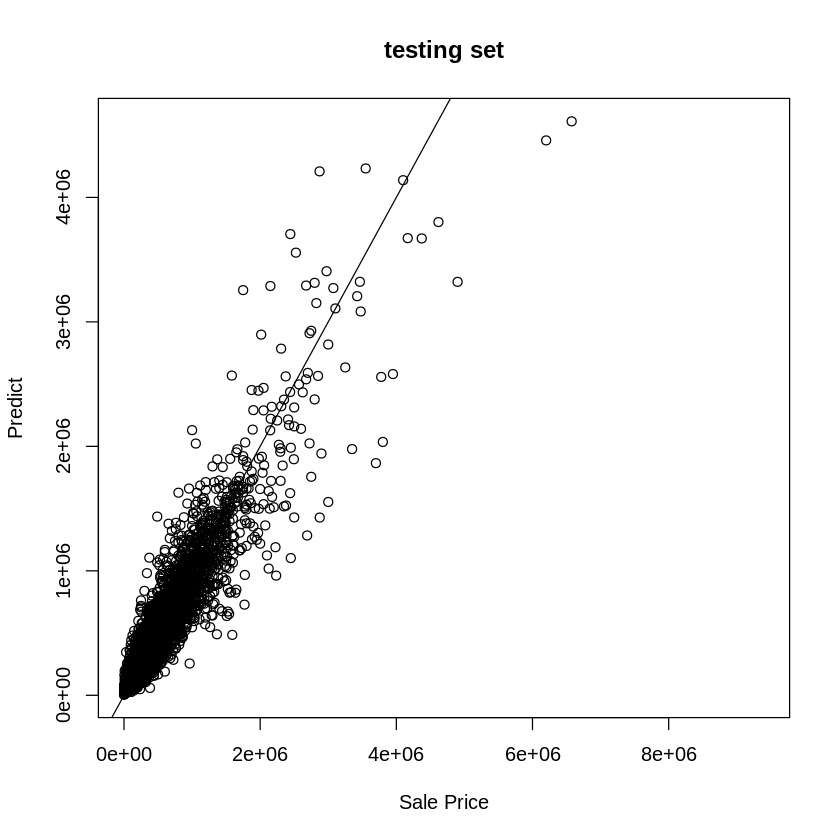

In [ ]:
plot(df_test_rf$sale_price, rf.all.predict, main = 'testing set',
    xlab = 'Sale Price', ylab = 'Predict')
abline(1, 1)

In [ ]:
# Mean Squared Error
mean((df_test_rf$sale_price- rf.all.predict)**2)
# RMSE
sqrt(mean((df_test_rf$sale_price- rf.all.predict)**2))

[1] NA

[1] NA

## Use predict dataset

In [ ]:
predict_rf <- predict

In [ ]:
# make predictions for records in the test set
rf.predict <-predict(rf.all, predict_rf)

In [ ]:
rf.predict.frame <- as.data.frame(rf.predict)
rf.predict.frame

In [ ]:
write.csv(rf.predict.frame,"predict_rf.csv", row.names = FALSE)

In [ ]:
predict_rf 

In [ ]:
summary(predict_rf[1])

In [ ]:
library(ggplot2)
library(dplyr)

In [ ]:
ggplot(data = rf.predict.frame,aes(x=rf.predict)) +
    geom_density(fill="#69b3a2", color="#e9ecef", alpha=0.8)

## variable importance

In [ ]:
# feature selection
#importance()
importance_label <- data.frame(importance(rf.all), check.names = FALSE)
head(importance_label)
 
# top 30 variable importance plot
varImpPlot(rf.all, n.var = min(30, nrow(rf.all$importance)),
    main = 'Top 30 - variable importance')
# %IncMSE: increase in mean squared error
# IncNodePurity: increase in node purity

In [ ]:
# sort the variables according to "IncNodePurity" 
importance_label  <- importance_label[order(importance_label$IncNodePurity, decreasing = TRUE), ]
head(importance_label)
 
# summary table
# write.table(importance_label, 'importance_label.txt', sep = '\t', col.names = NA, quote = FALSE)

# XGBoost

## Feature selection

In [ ]:
# Drop column names of the dataframe which starts with
df_train_rf <- select(df_train,-starts_with("geo_property_zip"))
df_train_xgb <- select(df_train_rf,-starts_with("char_cnst_qlty"))

In [ ]:
# Drop column names of the dataframe which starts with
df_test_rf <- select(df_test,-starts_with("geo_property_zip"))
df_test_xgb <- select(df_test_rf,-starts_with("char_cnst_qlty"))

## fit the xgb model

In [ ]:
# install.packages('xgboost')
library(xgboost)

In [ ]:
train_y_xgb <- as.data.frame(df_train_xgb$sale_price)                        
colnames(train_y_xgb) <- "sale_price"                                    
train_X_xgb <- df_train_xgb[, setdiff(colnames(df_train_xgb), c('sale_price'))]  
dim(train_X_xgb)

test_y_xgb <- as.data.frame(df_test_xgb$sale_price)                          
colnames(test_y_xgb) <- "sale_price"                                    
test_X_xgb <- df_test[, setdiff(colnames(df_test_xgb), c('sale_price'))]    
dim(test_X_xgb)

In [ ]:
m1_xgb <-
  xgboost(
    data = data.matrix(train_X_xgb),
    label=df_train_xgb$sale_price,
    nrounds = 1000,
    objective = "reg:squarederror",
    early_stopping_rounds = 3,
    max_depth = 5,
    eta = .24
  )   

In [ ]:
pred_xgb <- predict(m1_xgb, data.matrix(test_X_xgb))

In [ ]:
yhat <- pred_xgb
y <- df_test_xgb[, 1]
postResample(yhat, y)

In [ ]:
r <- y - yhat
plot(r, ylab = "residuals")

In [ ]:
plot(y,
     yhat,
     xlab = "actual",
     ylab = "predicted")
abline(lm(yhat ~ y))

In [ ]:
# install.packages('DiagrammeR')
library(DiagrammeR)

In [ ]:
#plot first 3 trees of model
xgb.plot.tree(model = m1_xgb, trees = 0:2)

importance_matrix <- xgb.importance(model = m1_xgb)
xgb.plot.importance(importance_matrix, xlab = "Feature Importance")

In [ ]:
# Mean Squared Error
mean((df_test_xgb$sale_price-pred_xgb)**2)
# RMSE
sqrt(mean((df_test_xgb$sale_price- pred_xgb)**2))

## Best parameter(optional)

In [ ]:
#create hyperparameter grid
hyper_grid <- expand.grid(max_depth = seq(3, 6, 1), eta = seq(.2, .35, .01))  

In [ ]:
for (j in 1:nrow(hyper_grid)) {
  set.seed(123)
  m_xgb_untuned <- xgb.cv(
    data = data.matrix(train_X_xgb),
    label=df_train_xgb$sale_price,
    nrounds = 1000,
    objective = "reg:squarederror",
    early_stopping_rounds = 3,
    nfold = 5,
    max_depth = hyper_grid$max_depth[j],
    eta = hyper_grid$eta[j]
  )
  
  xgb_train_rmse[j] <- m_xgb_untuned$evaluation_log$train_rmse_mean[m_xgb_untuned$best_iteration]
  xgb_test_rmse[j] <- m_xgb_untuned$evaluation_log$test_rmse_mean[m_xgb_untuned$best_iteration]
  
  cat(j, "\n")
}

In [ ]:
#ideal hyperparamters
hyper_grid[which.min(xgb_test_rmse), ]

#max_depth  eta
#5         0.24 

## Use predict dataset

In [ ]:
predict_xgb <- predict

In [ ]:
# Drop column names of the dataframe which starts with
predict_xgb <- select(predict_xgb,-starts_with("geo_property_zip"))
predict_xgb <- select(predict_xgb,-starts_with("char_cnst_qlty"))

In [ ]:
# make predictions for records in the predict set
colnames(predict_xgb) <- NULL
xgb.predict <-predict(m1_xgb, data.matrix(predict_xgb))

In [ ]:
xgb.predict.frame <- as.data.frame(xgb.predict)
xgb.predict.frame

# Neural Network

##Install Package

In [ ]:
install.packages('neuralnet')
library(neuralnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’



Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




## Normalization

In [ ]:
# Scale the data to the interval between zero and one
# Normalize the numerical predictors and the outcome variable in the Training Data
df_train_val <- preProcess(df_train, method="range")    
df_norm_train <- predict(df_train_val, df_train) 

# Normalize the numerical predictors and the outcome variable in the Test Data
df_test_val <- preProcess(df_test, method="range")    
df_norm_test <- predict(df_test_val, df_test)

##Variables Selection

In [ ]:
# Checking variable names and number of variables
names(df_norm_train)
length(names(df_norm_train))
# The outcome shows there are 255 variables, so we decide to break it down to roughly 4 sets of 60 variables and conduct variable selection one by one

[1] "meta_class_203"                 "meta_class_204"                
  [3] "meta_class_205"                 "meta_class_206"                
  [5] "meta_class_207"                 "meta_class_208"                
  [7] "meta_class_209"                 "meta_class_210"                
  [9] "meta_class_211"                 "meta_class_212"                
 [11] "meta_class_234"                 "meta_class_278"                
 [13] "meta_class_295"                 "meta_class_NA"                 
 [15] "meta_deed_type_T"               "meta_deed_type_W"              
 [17] "meta_deed_type_NA"              "char_ext_wall_2"               
 [19] "char_ext_wall_3"                "char_ext_wall_4"               
 [21] "char_ext_wall_NA"               "char_roof_cnst_2"              
 [23] "char_roof_cnst_3"               "char_roof_cnst_4"              
 [25] "char_roof_cnst_5"               "char_roof_cnst_6"              
 [27] "char_roof_cnst_NA"              "char_bsmt_2"                   
 [29] "char_bsmt_3"                    "char_bsmt_4"                   
 [31] "char_bsmt_NA"                   "char_bsmt_fin_2"               
 [33] "char_bsmt_fin_3"                "char_bsmt_fin_NA"              
 [35] "char_heat_2"                    "char_heat_3"                   
 [37] "char_heat_4"                    "char_heat_NA"                  
 [39] "char_oheat_5"                   "char_oheat_NA"                 
 [41] "char_air_2"                     "char_air_NA"                   
 [43] "char_attic_type_2"              "char_attic_type_3"             
 [45] "char_attic_type_NA"             "char_tp_plan_2"                
 [47] "char_tp_plan_NA"                "char_cnst_qlty_2"              
 [49] "char_cnst_qlty_NA"              "char_site_2"                   
 [51] "char_site_3"                    "char_site_NA"                  
 [53] "char_gar1_size_2"               "char_gar1_size_3"              
 [55] "char_gar1_size_4"               "char_gar1_size_5"              
 [57] "char_gar1_size_6"               "char_gar1_size_7"              
 [59] "char_gar1_size_8"               "char_gar1_size_NA"             
 [61] "char_gar1_cnst_2"               "char_gar1_cnst_3"              
 [63] "char_gar1_cnst_4"               "char_gar1_cnst_NA"             
 [65] "char_gar1_att_2"                "char_gar1_att_NA"              
 [67] "char_gar1_area_2"               "char_gar1_area_NA"             
 [69] "char_repair_cnd_2"              "char_repair_cnd_3"             
 [71] "char_repair_cnd_NA"             "char_use_2"                    
 [73] "char_use_NA"                    "char_type_resd_2"              
 [75] "char_type_resd_3"               "char_type_resd_4"              
 [77] "char_type_resd_5"               "char_type_resd_NA"             
 [79] "geo_property_zip_60004"         "geo_property_zip_60005"        
 [81] "geo_property_zip_60007"         "geo_property_zip_60008"        
 [83] "geo_property_zip_60010"         "geo_property_zip_60016"        
 [85] "geo_property_zip_60018"         "geo_property_zip_60022"        
 [87] "geo_property_zip_60025"         "geo_property_zip_60026"        
 [89] "geo_property_zip_60029"         "geo_property_zip_60043"        
 [91] "geo_property_zip_60053"         "geo_property_zip_60056"        
 [93] "geo_property_zip_60062"         "geo_property_zip_60067"        
 [95] "geo_property_zip_60068"         "geo_property_zip_60070"        
 [97] "geo_property_zip_60074"         "geo_property_zip_60076"        
 [99] "geo_property_zip_60077"         "geo_property_zip_60089"        
[101] "geo_property_zip_60090"         "geo_property_zip_60091"        
[103] "geo_property_zip_60093"         "geo_property_zip_60103"        
[105] "geo_property_zip_60104"         "geo_property_zip_60107"        
[107] "geo_property_zip_60120"         "geo_property_zip_60126"        
[109] "geo_property_zip_60130"         "geo_property_zip_60131"        
[111] "geo_property_zip_60133"         "ge

[1] 284

In [ ]:
#try1
# fit the model with first 60 predictors  
lm.full <- lm(sale_price ~ meta_class_203+meta_class_204+meta_class_205+meta_class_206+meta_class_207+meta_class_208+meta_class_209+meta_class_210+meta_class_211+meta_class_212+meta_class_234+meta_class_278+meta_class_295+meta_deed_type_T+meta_deed_type_W+char_ext_wall_2+char_ext_wall_3+char_ext_wall_4+char_roof_cnst_2+char_roof_cnst_3+char_roof_cnst_4+char_roof_cnst_5+char_roof_cnst_6+char_bsmt_2+char_bsmt_3+char_bsmt_4+char_bsmt_fin_2+char_bsmt_fin_3+char_heat_2+char_heat_3+char_heat_4+char_oheat_5+char_air_2+char_attic_type_2+char_attic_type_3+char_tp_plan_2+char_cnst_qlty_2+char_site_2+char_site_3+char_gar1_size_2+char_gar1_size_3+char_gar1_size_4+char_gar1_size_5+char_gar1_size_6+char_gar1_size_7+char_gar1_size_8+char_gar1_cnst_2+char_gar1_cnst_3+char_gar1_cnst_4+char_gar1_att_2+char_gar1_area_2+char_repair_cnd_2+char_repair_cnd_3+char_use_2+char_type_resd_2+char_type_resd_3+char_type_resd_4+char_type_resd_5+geo_property_zip_60004+geo_property_zip_60005
, data = df_train)
# use step() to run backward elimination 
lm.step.backward <- step(lm.full, direction = "backward")
# summary table 
summary(lm.step.backward)
# making predictions on the test set
predict(lm.step.backward, df_test)
# RMSE in the test set 
sqrt(mean((df_test$sale_price-predict(lm.step.backward, df_test))^2))

Start:  AIC=458574.9
sale_price ~ meta_class_203 + meta_class_204 + meta_class_205 + 
    meta_class_206 + meta_class_207 + meta_class_208 + meta_class_209 + 
    meta_class_210 + meta_class_211 + meta_class_212 + meta_class_234 + 
    meta_class_278 + meta_class_295 + meta_deed_type_T + meta_deed_type_W + 
    char_ext_wall_2 + char_ext_wall_3 + char_ext_wall_4 + char_roof_cnst_2 + 
    char_roof_cnst_3 + char_roof_cnst_4 + char_roof_cnst_5 + 
    char_roof_cnst_6 + char_bsmt_2 + char_bsmt_3 + char_bsmt_4 + 
    char_bsmt_fin_2 + char_bsmt_fin_3 + char_heat_2 + char_heat_3 + 
    char_heat_4 + char_oheat_5 + char_air_2 + char_attic_type_2 + 
    char_attic_type_3 + char_tp_plan_2 + char_cnst_qlty_2 + char_site_2 + 
    char_site_3 + char_gar1_size_2 + char_gar1_size_3 + char_gar1_size_4 + 
    char_gar1_size_5 + char_gar1_size_6 + char_gar1_size_7 + 
    char_gar1_size_8 + char_gar1_cnst_2 + char_gar1_cnst_3 + 
    char_gar1_cnst_4 + char_gar1_att_2 + char_gar1_area_2 + char_repair_cn

ERROR: ignored

In [ ]:
#try2
# After eliminating insignificant variables from the last try
# fit the model adding the second set of 60 predictors  
lm.full.2 <- lm(sale_price ~ meta_class_203+meta_class_204+meta_class_205+meta_class_206+meta_class_207+meta_class_208+meta_class_209+meta_class_210+meta_class_211+meta_class_212+meta_class_234+meta_class_278+meta_deed_type_T+meta_deed_type_W+char_ext_wall_2+char_ext_wall_3+char_ext_wall_4+char_roof_cnst_2+char_roof_cnst_3+char_roof_cnst_4+char_roof_cnst_5+char_roof_cnst_6+char_bsmt_2+char_bsmt_3+char_bsmt_4+char_bsmt_fin_3+char_heat_2+char_heat_4+char_air_2+char_attic_type_3+char_site_2+char_site_3+char_gar1_size_3+char_gar1_size_5+char_gar1_size_7+char_gar1_cnst_2+char_gar1_cnst_4+char_gar1_att_2+char_gar1_area_2+char_repair_cnd_2+char_repair_cnd_3+char_use_2+char_type_resd_2+char_type_resd_3+char_type_resd_4+geo_property_zip_60004+geo_property_zip_60007+geo_property_zip_60008+geo_property_zip_60010+geo_property_zip_60016+geo_property_zip_60018+geo_property_zip_60022+geo_property_zip_60025+geo_property_zip_60026+geo_property_zip_60029+geo_property_zip_60043+geo_property_zip_60053+geo_property_zip_60056+geo_property_zip_60062+geo_property_zip_60067+geo_property_zip_60068+geo_property_zip_60070+geo_property_zip_60074+geo_property_zip_60076+geo_property_zip_60077+geo_property_zip_60089+geo_property_zip_60090+geo_property_zip_60091+geo_property_zip_60093+geo_property_zip_60103+geo_property_zip_60104+geo_property_zip_60107+geo_property_zip_60120+geo_property_zip_60126+geo_property_zip_60130+geo_property_zip_60131+geo_property_zip_60133+geo_property_zip_60153+geo_property_zip_60154+geo_property_zip_60155+geo_property_zip_60160+geo_property_zip_60162+geo_property_zip_60163+geo_property_zip_60164+geo_property_zip_60165+geo_property_zip_60169+geo_property_zip_60171+geo_property_zip_60172+geo_property_zip_60173+geo_property_zip_60176+geo_property_zip_60192+geo_property_zip_60193+geo_property_zip_60194+geo_property_zip_60195+geo_property_zip_60201+geo_property_zip_60202+geo_property_zip_60203+geo_property_zip_60301+geo_property_zip_60302+geo_property_zip_60304+geo_property_zip_60305+geo_property_zip_60402+geo_property_zip_60406+geo_property_zip_60409+geo_property_zip_60411+geo_property_zip_60415,
, data = df_train)
# use step() to run backward elimination 
lm.step.backward.2 <- step(lm.full.2, direction = "backward")
# summary table 
summary(lm.step.backward.2)
# making predictions on the test set
predict(lm.step.backward.2, df_test)
# RMSE in the test set 
sqrt(mean((df_test$sale_price-predict(lm.step.backward.2, df_test))^2))
# As seen in the result, the RMSE dropped a little bit

In [ ]:
#try3
# After eliminating insignificant variables from the last try
# fit the model adding the third set of 60 predictors, also eliminating all geo_zip_code variables, since it's not doing much to the model  
lm.full.3 <- lm(sale_price ~ meta_class_203+meta_class_204+meta_class_205+meta_class_206+meta_class_207+meta_class_208+meta_class_209+meta_class_211+meta_class_212+meta_class_234+meta_class_278+meta_deed_type_T+meta_deed_type_W+char_ext_wall_2+char_ext_wall_3+char_ext_wall_4+char_roof_cnst_2+char_roof_cnst_3+char_roof_cnst_4+char_roof_cnst_5+char_roof_cnst_6+char_bsmt_2+char_bsmt_3+char_bsmt_4+char_bsmt_fin_3+char_heat_4+char_air_2+char_attic_type_3+char_site_2+char_site_3+char_gar1_size_3+char_gar1_size_5+char_gar1_size_7+char_gar1_cnst_2+char_gar1_cnst_4+char_gar1_att_2+char_gar1_area_2+char_repair_cnd_2+char_repair_cnd_3+char_use_2+char_type_resd_2+char_type_resd_3+char_type_resd_4+geo_ohare_noise_1+geo_floodplain_1+geo_fs_flood_risk_direction_0+geo_fs_flood_risk_direction_1+geo_withinmr100_1+geo_withinmr101300_1+ind_large_home_TRUE+ind_garage_TRUE+ind_arms_length_TRUE+sale_price+meta_nbhd+meta_certified_est_bldg+meta_certified_est_land+char_hd_sf+char_age+char_rooms+char_beds+char_frpl+char_fbath+char_hbath+char_ot_impr+char_bldg_sf+geo_tract_pop+geo_white_perc+geo_black_perc+geo_asian_perc+geo_his_perc+geo_other_perc+geo_fs_flood_factor+econ_tax_rate+econ_midincome, data = df_train)
# use step() to run backward elimination 
lm.step.backward.3 <- step(lm.full.3, direction = "backward")
# summary table 
summary(lm.step.backward.3)
# making predictions on the test set
predict(lm.step.backward.3, df_test)
# RMSE in the test set 
sqrt(mean((df_test$sale_price-predict(lm.step.backward.3, df_test))^2))
# As seen in the result, the RMSE dropped tremendously

In [ ]:
# Final Selection
# fit the model with the rest of the values 
lm.full.4 <- lm(sale_price ~ meta_class_204+meta_class_205+meta_class_208+meta_class_209+meta_class_211+meta_class_212+meta_class_278+meta_deed_type_T+meta_deed_type_W+char_ext_wall_3+char_ext_wall_4+char_roof_cnst_2+char_roof_cnst_3+char_roof_cnst_5+char_roof_cnst_6+char_bsmt_2+char_bsmt_3+char_bsmt_fin_3+char_heat_4+char_air_2+char_site_2+char_gar1_size_7+char_gar1_cnst_2+char_gar1_att_2+char_gar1_area_2+char_repair_cnd_3+char_type_resd_3+char_type_resd_4+geo_ohare_noise_1+geo_fs_flood_risk_direction_1+geo_withinmr100_1+geo_withinmr101300_1+ind_large_home_TRUE+ind_garage_TRUE+ind_arms_length_TRUE+sale_price+meta_nbhd+meta_certified_est_bldg+meta_certified_est_land+char_hd_sf+char_age+char_rooms+char_beds+char_fbath+char_hbath+char_ot_impr+char_bldg_sf+geo_tract_pop+geo_white_perc+geo_black_perc+geo_his_perc+geo_other_perc+econ_tax_rate+econ_midincome, data = df_train)
# use step() to run backward elimination 
lm.step.backward.4 <- step(lm.full.4, direction = "backward")
# summary table 
summary(lm.step.backward.4)
# making predictions on the test set
predict(lm.step.backward.4, df_test)
# RMSE in the test set 
sqrt(mean((df_test$sale_price-predict(lm.step.backward.4, df_test))^2))

##Fit Model

In [ ]:
#Fit the selected variables in the model
nn1 <- neuralnet(sale_price ~ meta_class_204+meta_class_205+meta_class_208+meta_class_209+meta_class_211+meta_class_212+meta_class_278+meta_deed_type_T+meta_deed_type_W+char_ext_wall_3+char_ext_wall_4+char_roof_cnst_2+char_roof_cnst_3+char_roof_cnst_5+char_roof_cnst_6+char_bsmt_2+char_bsmt_3+char_bsmt_fin_3+char_heat_4+char_air_2+char_site_2+char_gar1_size_7+char_gar1_cnst_2+char_gar1_att_2+char_gar1_area_2+char_repair_cnd_3+char_type_resd_3+char_type_resd_4+geo_ohare_noise_1+geo_fs_flood_risk_direction_1+geo_withinmr100_1+geo_withinmr101300_1+ind_large_home_TRUE+ind_garage_TRUE+ind_arms_length_TRUE+sale_price+meta_nbhd+meta_certified_est_bldg+meta_certified_est_land+char_hd_sf+char_age+char_rooms+char_beds+char_fbath+char_hbath+char_ot_impr+char_bldg_sf+geo_tract_pop+geo_white_perc+geo_black_perc+geo_his_perc+geo_other_perc+econ_tax_rate+econ_midincome, 
                data = df_norm_train, linear.output = TRUE, hidden = 2)

In [ ]:
#Make Prediction
predict.nn1 <- compute(nn1, df_norm_test)
head(predict.nn1$net.result)
#Check the RMSE
sqrt(mean((df_norm_test$sale_price-predict.nn1$net.result)^2))

# **LASSO** **REGRESSION**

### **Data** **Visualisation**

In [ ]:

options(repr.plot.width=10, repr.plot.height=8)
plot(x=historic_property_data$sale_price, y=historic_property_data$meta_certified_est_bldg, pch=18, cex=2, col="orange",cex.main=1.5, cex.lab = 1.5,cex.axis=1, xlab="Meta Certified East Buiding", ylab="Sale Price", main="Scatter plot showing Sale Price vs Meta_certified_est_bldg") 



In [ ]:
install.packages('glmnet')
library(glmnet)


In [ ]:
test_sample <- sample(c(1:dim(df_test)[1]), dim(df_test)[1]*1) 

In [ ]:
# convert a data frame of predictors to a matrix and create dummy variables for character variables 

x <- model.matrix(sale_price~.,historic_property_data)[,-1]

In [ ]:
head(x)

In [ ]:
y <- historic_property_data$sale_price
is.vector(y) #to check if y is a vector

In [ ]:
y.test <- y[test_sample] # outcome in the test set

In [ ]:
# fit a lasso regression model 

fit<- glmnet(x[train_sample,],y[train_sample],alpha=1)

In [ ]:
fit$lambda

In [ ]:
dim(coef(fit))

In [ ]:
# Return a medium lambda value 
lambda.medium <-fit$lambda[20]
lambda.medium

In [ ]:
# lasso regression coefficients  
coef.lambda.medium <- predict(fit,s=lambda.medium,type="coefficients")[1:20,]
coef.lambda.medium


In [ ]:
# non-zero coefficient estimates  
coef.lambda.medium[coef.lambda.medium!=0]

In [ ]:
# make predictions for records the test set 
pred.lambda.medium <- predict(fit,s=lambda.medium,newx=x[test_sample,])
head(pred.lambda.medium)


In [ ]:
# MSE in the test set 
mean((y.test-pred.lambda.medium)^2)

In [ ]:
#RMSE 
sqrt(mean((y.test-pred.lambda.medium)^2))